1. Load dataset and prepare train/test data

In [1708]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# dataset source:
# https://github.com/adrianstando/imbalanced-benchmarking-set/blob/main/datasets/wine_quality.csv
df = pd.read_csv('data/wine_quality.csv')
Y = df["TARGET"]
X = df.drop(axis=1, columns=["TARGET", "Unnamed: 0"])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=22)

In [1709]:
def display_results(y_pred, y_test, name):
    score = {
        "accuracy": accuracy_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred)
    }
    print(f"{name}:\n\taccuracy= {score['accuracy']}\n\trecall = {score['recall']}\n\tprecision = {score['precision']}")

2. Logistic Regression model

In [1710]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score

lr_model = LogisticRegression(max_iter=10000, class_weight="balanced", random_state=22)
lr_model.fit(X_train, Y_train)
lr_Y_pred = lr_model.predict(X_test)
lr_Y_train_pred = lr_model.predict(X_train)
display_results(lr_Y_train_pred, Y_train, "Logistic Regression - train")
display_results(lr_Y_pred, Y_test, "Logistic Regression - test")

Logistic Regression - train:
	accuracy= 0.7409326424870466
	recall = 0.6507936507936508
	precision = 0.09234234234234234
Logistic Regression - test:
	accuracy= 0.7427334570191713
	recall = 0.7017543859649122
	precision = 0.09111617312072894


3. Random Forest model

In [1711]:
from sklearn.ensemble import RandomForestClassifier

rm_model = RandomForestClassifier(n_estimators=4, random_state=22, max_depth=4, class_weight="balanced")
rm_model.fit(X_train, Y_train)
rm_Y_pred = rm_model.predict(X_test)
rm_Y_train_pred = rm_model.predict(X_train)
display_results(rm_Y_train_pred, Y_train, "Random Forest - train")
display_results(rm_Y_pred, Y_test, "Random Forest - test")

Random Forest - train:
	accuracy= 0.8759524535202682
	recall = 0.6904761904761905
	precision = 0.1912087912087912
Random Forest - test:
	accuracy= 0.8540507111935683
	recall = 0.5789473684210527
	precision = 0.1346938775510204


4. TabPFN model

In [1712]:
from tabpfn import TabPFNClassifier

classifier = TabPFNClassifier(device='cpu', N_ensemble_configurations=32)
tab_X_train, _, tab_Y_train, _ = train_test_split(X_train, Y_train, test_size=0.8, random_state=22) # we want approximately 1000 records - TabPFNClassifier limit
classifier.fit(tab_X_train, tab_Y_train)
tab_Y_pred = classifier.predict(X_test)
display_results(tab_Y_pred, Y_test, "TabPFNClassifier")

Loading model that can be used for inference only
Using a Transformer with 25.82 M parameters


/home/mdrzewiecki/.local/lib/python3.10/site-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


TabPFNClassifier:
	accuracy= 0.9659863945578231
	recall = 0.10526315789473684
	precision = 0.6


5. Comparison charts

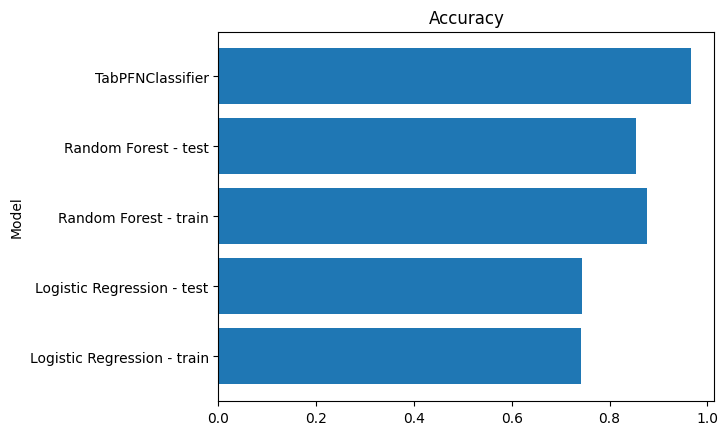

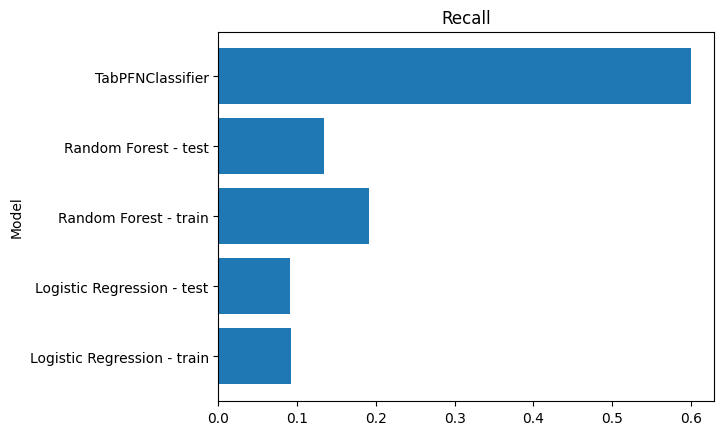

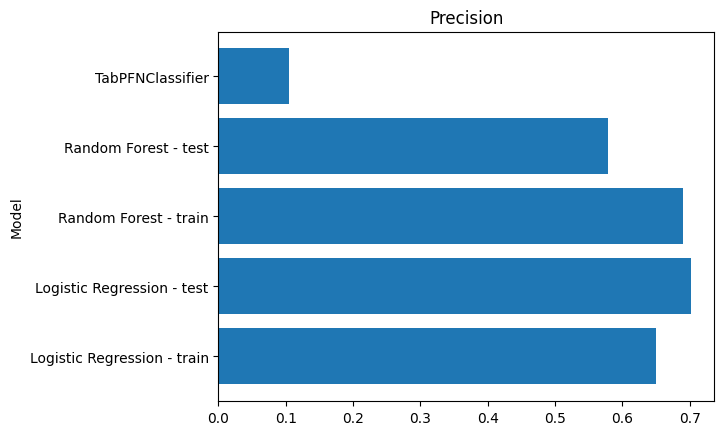

In [1713]:
import matplotlib
import matplotlib.pyplot as plt

def plot_values(metric, name):
    labels = [
        "Logistic Regression - train",
        "Logistic Regression - test",
        "Random Forest - train",
        "Random Forest - test",
        "TabPFNClassifier"
    ]
    values = [
        metric(lr_Y_train_pred, Y_train),
        metric(lr_Y_pred, Y_test),
        metric(rm_Y_train_pred, Y_train),
        metric(rm_Y_pred, Y_test),
        metric(tab_Y_pred, Y_test),
    ]
    plt.barh(labels, values)
    plt.ylabel("Model")
    plt.title(name)
    plt.show()

plot_values(accuracy_score, "Accuracy")
plot_values(recall_score, "Recall")
plot_values(precision_score, "Precision")
